In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import os
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")


In [ ]:
data = pd.read_csv('./s_p_stock/all_stocks_5yr.csv')
print(data.shape)
print(data.sample(7))


(219331, 7)
              date     open    high     low   close     volume  Name
185053  2015-12-23   67.200   68.14   67.20   68.08  2334699.0     D
95038   2014-12-23   36.940   37.12   36.84   36.93  2376321.0   CAG
214772  2017-11-10  116.340  121.15  115.55  120.74  3817361.0  EXPE
144121  2016-11-14   74.910   75.04   72.54   72.76  7241741.0   CRM
131009  2014-06-18   37.875   38.51   37.67   38.47  1372878.0   CNC
173336  2015-09-25   69.750   70.46   69.60   70.11  3275189.0  DLTR
101214  2014-07-07   48.440   48.72   47.90   48.30   688155.0  CBOE


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219331 entries, 0 to 219330
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    219331 non-null  object 
 1   open    219326 non-null  float64
 2   high    219328 non-null  float64
 3   low     219328 non-null  float64
 4   close   219330 non-null  float64
 5   volume  219330 non-null  float64
 6   Name    219330 non-null  object 
dtypes: float64(5), object(2)
memory usage: 11.7+ MB


In [ ]:
data['date'] = pd.to_datetime(data['date'], infer_datetime_format=True, errors='coerce')
print(data.info())  # Check for any NaT values in the date column


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219331 entries, 0 to 219330
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   date    219330 non-null  datetime64[ns]
 1   open    219326 non-null  float64       
 2   high    219328 non-null  float64       
 3   low     219328 non-null  float64       
 4   close   219330 non-null  float64       
 5   volume  219330 non-null  float64       
 6   Name    219330 non-null  object        
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 11.7+ MB
None


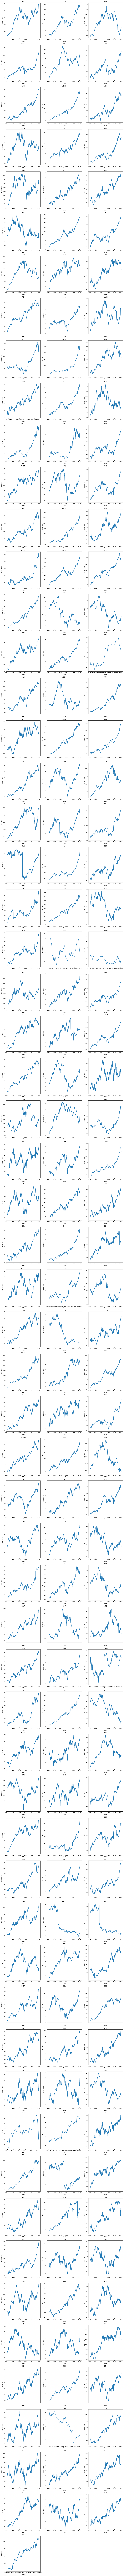

In [ ]:
import matplotlib.pyplot as plt
import math
data = data.dropna(subset=['date'])

# Ensure the 'Name' column exists and extract unique company names
if 'Name' in data.columns:
    companies = data['Name'].unique()
else:
    raise ValueError("The 'Name' column is not present in the data.")
num_companies = len(companies)
num_cols = 3  # Set the number of columns you want
num_rows = math.ceil(num_companies / num_cols)  # Calculate the number of rows needed

# Plot date vs close for each company
plt.figure(figsize=(15, 5 * num_rows))  # Adjust the height based on the number of rows
for index, company in enumerate(companies, 1):
    plt.subplot(num_rows, num_cols, index)
    company_data = data[data['Name'] == company]
    plt.plot(company_data['date'], company_data['close'])
    plt.title(company)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
plt.tight_layout()
plt.show()

Now let’s analyze the data for Apple Stocks from 2013 to 2018.


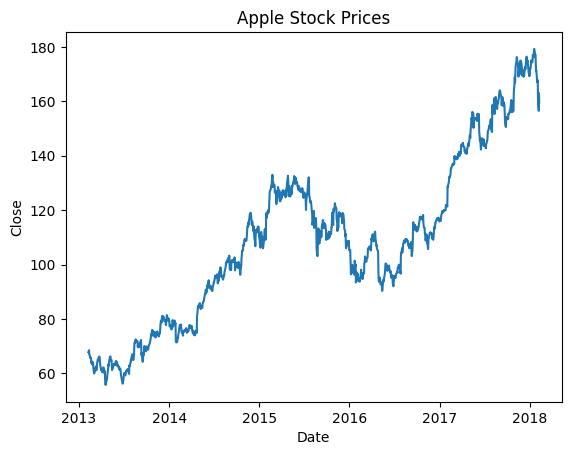

In [ ]:
apple = data[data['Name'] == 'AAPL']
prediction_range = apple.loc[(apple['date'] > datetime(2013,1,1))
& (apple['date']<datetime(2018,1,1))]
plt.plot(apple['date'],apple['close'])
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Apple Stock Prices")
plt.show()


In [ ]:
close_data = apple.filter(['close'])
dataset = close_data.values
training = int(np.ceil(len(dataset) * .95))
print(training)


1197


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:int(training), :]
# prepare feature and labels
x_train = []
y_train = []

for i in range(60, len(train_data)):
	x_train.append(train_data[i-60:i, 0])
	y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

# Create the model
model = Sequential()

# Add the first LSTM layer with 64 units and return sequences
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add a second LSTM layer with 64 units
model.add(LSTM(units=64))

# Add a Dense layer with 32 units
model.add(Dense(32, activation='relu'))

# Add a Dropout layer
model.add(Dropout(0.5))

# Add the output layer
model.add(Dense(1))

# Print the model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 60, 64)            16896     
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 52033 (203.25 KB)
Trainable params: 52033 (203.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
			loss='mean_squared_error')
history = model.fit(x_train,
					y_train,
					epochs=10)


Epoch 1/10
36/36 [==============================] - 9s 83ms/step - loss: 0.0564
Epoch 2/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0249
Epoch 3/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0199
Epoch 4/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0168
Epoch 5/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0186
Epoch 6/10
36/36 [==============================] - 3s 96ms/step - loss: 0.0152
Epoch 7/10
36/36 [==============================] - 3s 71ms/step - loss: 0.0154
Epoch 8/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0148
Epoch 9/10
36/36 [==============================] - 2s 61ms/step - loss: 0.0152
Epoch 10/10
36/36 [==============================] - 2s 64ms/step - loss: 0.0140


In [ ]:
test_data = scaled_data[training - 60:, :]
x_test = []
y_test = dataset[training:, :]
for i in range(60, len(test_data)):
	x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# predict the testing data
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# evaluation metrics
mse = np.mean(((predictions - y_test) ** 2))
print("MSE", mse)
print("RMSE", np.sqrt(mse))


2/2 [==============================] - 2s 20ms/step
MSE 21.126976219382094
RMSE 4.596409057012016


In [ ]:
import matplotlib.pyplot as plt

# Assuming 'apple' DataFrame is already defined and contains 'Date' and 'Close' columns
# 'training' is the index where you split the data
# 'predictions' is the array of predicted values for the test set

# Split the data
train = apple[:training]
test = apple[training:].copy()  # Use .copy() to avoid SettingWithCopyWarning
test['Predictions'] = predictions

# Ensure 'Date' column is in datetime format
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(train['Date'], train['Close'], label='Train')
plt.plot(test['Date'], test['Close'], label='Test')
plt.plot(test['Date'], test['Predictions'], label='Predictions')
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close')
plt.legend()
plt.show()


KeyError: 'Date'

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')
Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name',
       'Predictions'],
      dtype='object')


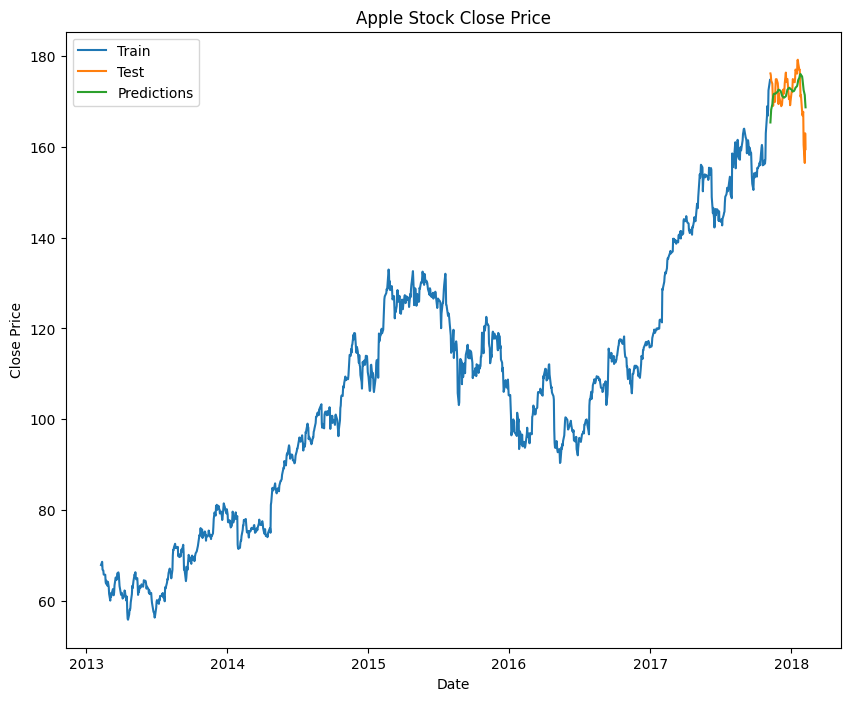

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'train' and 'test' DataFrames are defined correctly
# Example: train = apple[:training].copy()

# Verify the columns in 'train' and 'test'
print(train.columns)
print(test.columns)

# Ensure 'date' column is present and convert to datetime if needed
# Adjust as per your actual DataFrame structure
train['date'] = pd.to_datetime(train['date'])
test['date'] = pd.to_datetime(test['date'])

# Plotting
plt.figure(figsize=(10, 8))

# Example plot assuming 'close' column is present
plt.plot(train['date'], train['close'], label='Train')
plt.plot(test['date'], test['close'], label='Test')
plt.plot(test['date'], test['Predictions'], label='Predictions')

# Adding title and labels
plt.title('Apple Stock Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')

# Adding legend
plt.legend()

# Display the plot
plt.show()
